In [3]:
import torch

logits = torch.randn(2, 3, 4)  # Example logits tensor
print(logits)
flattened_logits = torch.flatten(logits)
print(flattened_logits.shape)  # Output: torch.Size([24])
print(flattened_logits)

tensor([[[ 0.8227,  1.3130, -1.0887, -1.4778],
         [ 0.9889, -1.8032, -1.3935, -0.7834],
         [ 0.1868,  0.0803,  0.3944,  1.1964]],

        [[ 1.6804,  0.4763, -1.4408, -0.8189],
         [-1.2553, -0.1498,  0.3176, -0.1072],
         [-1.3099,  0.1600,  1.0133,  1.1892]]])
torch.Size([24])
tensor([ 0.8227,  1.3130, -1.0887, -1.4778,  0.9889, -1.8032, -1.3935, -0.7834,
         0.1868,  0.0803,  0.3944,  1.1964,  1.6804,  0.4763, -1.4408, -0.8189,
        -1.2553, -0.1498,  0.3176, -0.1072, -1.3099,  0.1600,  1.0133,  1.1892])


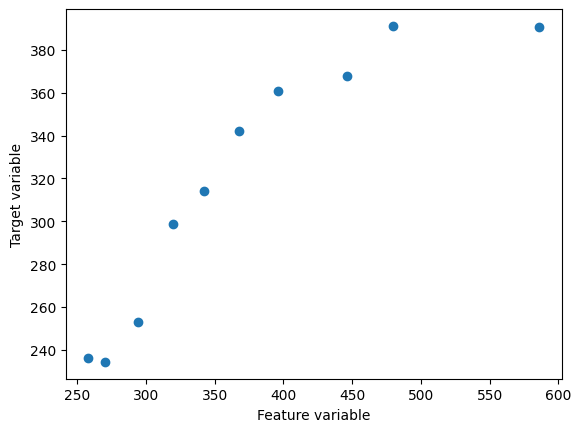

In [1]:
import torch

X_train = torch.tensor(
    [258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]
).view(-1, 1)

y_train = torch.tensor(
    [236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]
)

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.show()

In [3]:
class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            torch.nn.Linear(num_features, 50),
            torch.nn.ReLU(),

            torch.nn.Linear(50, 25),
            torch.nn.ReLU(),

            torch.nn.Linear(25, 1)
        )

    def forward(self, x):
        # because it is continous value set,
        # self.all_layers return is something like [[x], [x], [x]]
        # we want something like [x,x,x] for mse_loss function
        return self.all_layers(x).flatten()

In [4]:
x_mean, x_std = X_train.mean(), X_train.std()
y_mean, y_std = y_train.mean(), y_train.std()

X_train_norm = (X_train - x_mean) / x_std
y_train_norm = (y_train - y_mean) / y_std

In [5]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.features = x
        self.target = y

    def __getitem__(self, index):
        return self.features[index], self.target[index]
    
    def __len__(self):
        return self.target.shape[0]
    
train_ds = MyDataset(X_train_norm, y_train_norm)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=20,
    shuffle=True,
)    

In [6]:
import torch.nn.functional as F

num_epochs = 30
model = PyTorchMLP(1)
model.to("cuda")
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

for epoch in range(num_epochs):
    model = model.train()

    for batch_idx, (features, targets) in enumerate(train_loader):
        features = features.to("cuda")
        targets = targets.to("cuda")
        values = model(features)

        loss = F.mse_loss(values, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not batch_idx % 250:
            ### LOGGING
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Train Loss: {loss:.2f}"
            )        

Epoch: 001/030 | Batch 000/001 | Train Loss: 1.01
Epoch: 002/030 | Batch 000/001 | Train Loss: 0.66
Epoch: 003/030 | Batch 000/001 | Train Loss: 0.49
Epoch: 004/030 | Batch 000/001 | Train Loss: 0.37
Epoch: 005/030 | Batch 000/001 | Train Loss: 0.28
Epoch: 006/030 | Batch 000/001 | Train Loss: 0.21
Epoch: 007/030 | Batch 000/001 | Train Loss: 0.17
Epoch: 008/030 | Batch 000/001 | Train Loss: 0.14
Epoch: 009/030 | Batch 000/001 | Train Loss: 0.11
Epoch: 010/030 | Batch 000/001 | Train Loss: 0.10
Epoch: 011/030 | Batch 000/001 | Train Loss: 0.09
Epoch: 012/030 | Batch 000/001 | Train Loss: 0.08
Epoch: 013/030 | Batch 000/001 | Train Loss: 0.07
Epoch: 014/030 | Batch 000/001 | Train Loss: 0.07
Epoch: 015/030 | Batch 000/001 | Train Loss: 0.06
Epoch: 016/030 | Batch 000/001 | Train Loss: 0.06
Epoch: 017/030 | Batch 000/001 | Train Loss: 0.05
Epoch: 018/030 | Batch 000/001 | Train Loss: 0.05
Epoch: 019/030 | Batch 000/001 | Train Loss: 0.05
Epoch: 020/030 | Batch 000/001 | Train Loss: 0.04


In [16]:
import torch
print(torch.cuda.is_available())

False
